Name-Vivekjyoti bhowmik 
(SC22M082)

In [1]:
#reading the data 

import pandas as pd 
df = pd.read_csv("real_galaxies" , sep = "\t")

In [2]:
#selecting the recuired data
redshift = df.loc[: , "z"]

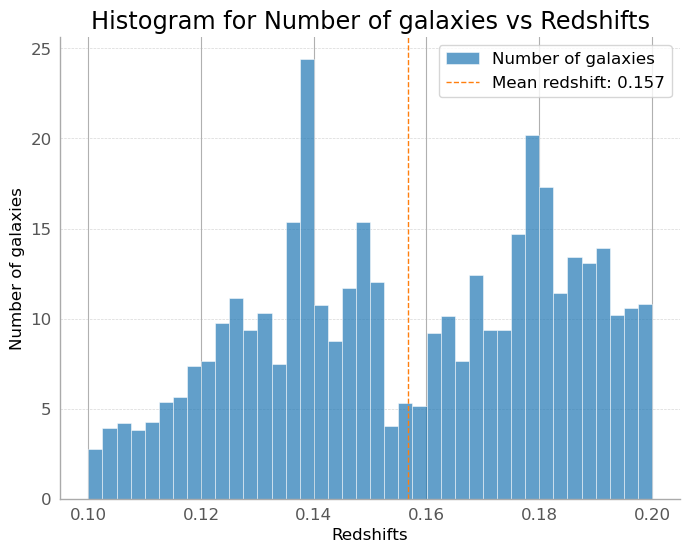

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


# Create the histogram with fill option
fig, ax = plt.subplots()
ax.hist(redshift, bins=40, density=True, alpha=0.7, color='#1f77b4', edgecolor='white', linewidth=0.5, label='Number of galaxies')

# Add a vertical line for the mean redshift
mean = np.mean(redshift)
ax.axvline(mean, color='#ff7f0e', linestyle='dashed', linewidth=1, label=f'Mean redshift: {mean:.3f}')

# Set the title and labels for the plot
ax.set_title('Histogram for Number of galaxies vs Redshifts')
ax.set_xlabel('Redshifts')
ax.set_ylabel('Number of galaxies')

# Add grid lines
ax.grid(axis='y', alpha=0.5, linestyle='dashed', linewidth=0.5)

# Add legend
ax.legend()

# Use seaborn style to further customize the plot
sns.set_style("whitegrid")
sns.despine(fig)

# Show the plot
plt.show()


In [4]:
#reading random galaxy data 

import pandas as pd 
df1 = pd.read_csv("random_galaxies" , sep = "\t")

In [5]:
#selecting the recuired data
redshift2 = df1.loc[: , "Z"]

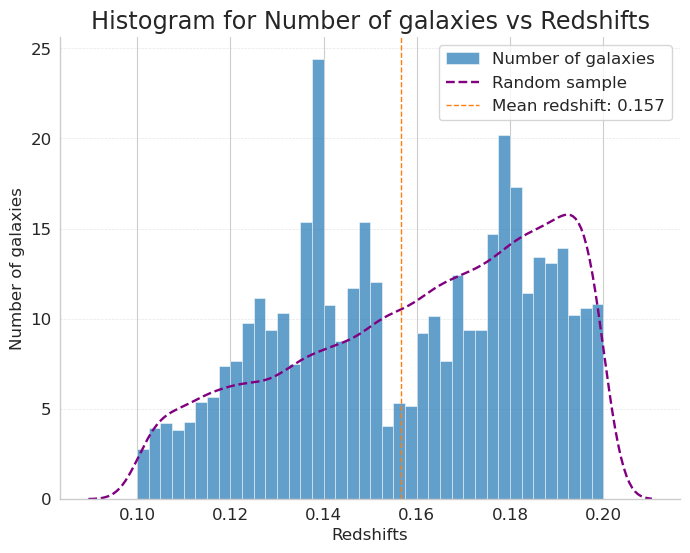

In [6]:
#Ploting the random sample vs real sample 

import seaborn as sns

#Histogram of the real data 
fig, ax = plt.subplots()
ax.hist(redshift, bins=40, density=True, alpha=0.7, color='#1f77b4', edgecolor='white', 
        linewidth=0.5,label='Number of galaxies')

# Overplot the random sample distribution as a smooth curve
sns.kdeplot(redshift2, color='purple', linestyle='--', label='Random sample', ax=ax)

# Add a vertical line for the mean redshift
mean = np.mean(redshift)
ax.axvline(mean, color='#ff7f0e', linestyle='dashed', linewidth=1, label=f'Mean redshift: {mean:.3f}')

# Set the title and labels for the plot
ax.set_title('Histogram for Number of galaxies vs Redshifts')
ax.set_xlabel('Redshifts')
ax.set_ylabel('Number of galaxies')

# Add grid lines
ax.grid(axis='y', alpha=0.5, linestyle='dashed', linewidth=0.5)

# Add legend
ax.legend()

# Use seaborn style to further customize the plot
sns.set_style("whitegrid")
sns.despine(fig)

# Show the plot
plt.show()


Overplotting the random sample distribution as a smooth curve over the real data histogram allows us to visualize how well the random sample distribution matches the distribution of the real data. If the two distributions match well, then we can be more confident that the random sample is a good representation of the real data and can be used for further analysis.

In [7]:
#Extacting the ra and dec for both real and random galaxies 

ra1 = df.loc[:, "ra"]
dec1 = df.loc[:, 'dec']

ra2  = df1.loc[:,"RA"]
dec2 = df1.loc[:,"DEC"]



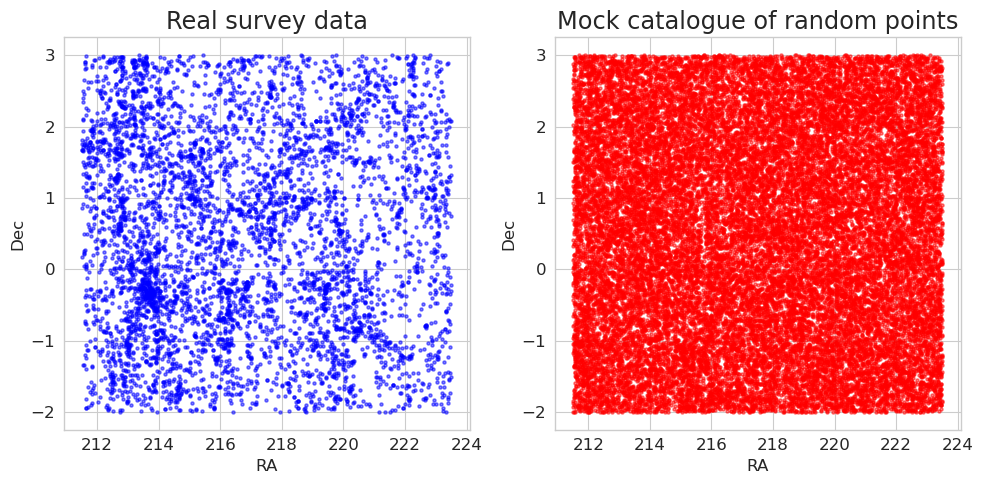

In [8]:
import matplotlib.pyplot as plt

# Extracting RA and Dec for real and random galaxies
ra_real = df.loc[:, "ra"]
dec_real = df.loc[:, 'dec']
ra_random = df1.loc[:,"RA"]
dec_random = df1.loc[:,"DEC"]

# Plotting the data in two panels
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Panel 1: Real survey data
ax1.scatter(ra_real, dec_real, s=5, c='b', alpha=0.5)
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
ax1.set_title('Real survey data')

# Panel 2: Random catalogue of points
ax2.scatter(ra_random, dec_random, s=5, c='r', alpha=0.5)
ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')
ax2.set_title('Mock catalogue of random points')

plt.tight_layout()
plt.show()


A two-panel plot in RA-Dec space of the data points that belong to the real survey and the mock catalogue of random points is important because it allows us to visually compare the distribution of the real survey data with that of a random sample.

By comparing the two panels, we can see if the real survey data is randomly distributed or if there are any noticeable patterns or structures that may indicate the presence of large-scale structure in the universe. This can provide important insights into the nature of the universe and help us understand the processes that govern its evolution.


In [9]:
import numpy as np
from scipy.spatial import cKDTree
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Define cosmology
cosmo = FlatLambdaCDM(H0=100, Om0=0.3)

# Calculate comoving distances for real galaxies
distance_real = cosmo.comoving_distance(redshift).to_value('Mpc')

# Calculate comoving distances for random galaxies
distance_random = cosmo.comoving_distance(redshift2).to_value('Mpc')

# Create KDTree for real galaxy positions
real_tree = cKDTree(np.column_stack((ra_real, dec_real, distance_real)))

# Create KDTree for random galaxy positions
random_tree = cKDTree(np.column_stack((ra_random, dec_random, distance_random)))

# Define the r bins for TPCF estimation
r_bins = [0.15, 0.30, 0.45, 0.9, 1.5, 2.7, 4.8, 8.5, 15, 27, 47.5]

# Initialize arrays to store DD, RR, and DR counts for each bin
DD_counts = np.zeros(len(r_bins)-1)
RR_counts = np.zeros(len(r_bins)-1)
DR_counts = np.zeros(len(r_bins)-1)

# Loop over r bins and calculate DD, RR, and DR counts
for i in range(len(r_bins)-1):
    # Find pairs in real data within r bin
    pairs_DD = real_tree.count_neighbors(real_tree, r_bins[i+1], cumulative=False)
    pairs_DD -= real_tree.count_neighbors(real_tree, r_bins[i], cumulative=False)

    # Find pairs in random data within r bin
    pairs_RR = random_tree.count_neighbors(random_tree, r_bins[i+1], cumulative=False)
    pairs_RR -= random_tree.count_neighbors(random_tree, r_bins[i], cumulative=False)

    # Find pairs between real and random data within r bin
    pairs_DR = real_tree.count_neighbors(random_tree, r_bins[i+1], cumulative=False)
    pairs_DR -= real_tree.count_neighbors(random_tree, r_bins[i], cumulative=False)

    # Store counts in respective arrays
    DD_counts[i] = np.sum(pairs_DD)
    RR_counts[i] = np.sum(pairs_RR)
    DR_counts[i] = np.sum(pairs_DR)

# Calculate TPCF using Landy-Szalay estimator
ND = len(ra_real)
NR = len(ra_random)
xi = 1 + (DD_counts / RR_counts) * (NR / ND)**2 - 2 * (DR_counts / RR_counts) * (NR / ND)


# Print the calculated TPCF values for each bin
print("TPCF values:")
for i in range(len(r_bins)-1):
    print("r = {:.2f}  xi : {:.4f}".format(r_bins[i], xi[i]))


TPCF values:
r = 0.15  xi : 5.4996
r = 0.30  xi : 3.7568
r = 0.45  xi : 1.8603
r = 0.90  xi : 0.9763
r = 1.50  xi : 0.4947
r = 2.70  xi : 0.1837
r = 4.80  xi : 0.1203
r = 8.50  xi : 0.0384
r = 15.00  xi : 0.0312
r = 27.00  xi : 0.0223


In [10]:
from tabulate import tabulate



# Define the data to be printed
data = []
for i in range(len(r_bins)-1):
    data.append([r_bins[i], DD_counts[i], RR_counts[i], DR_counts[i], xi[i]])

    
    
# Define the table headers
headers = ["r (Mpc)", "DD(r)", "RR(r)", "DR(r)", "ξ(r)"]


# Print the table
print(tabulate(data, headers=headers, tablefmt="fancy_grid"))


╒═══════════╤══════════════════╤══════════════════╤══════════════════╤═══════════╕
│   r (Mpc) │            DD(r) │            RR(r) │            DR(r) │      ξ(r) │
╞═══════════╪══════════════════╪══════════════════╪══════════════════╪═══════════╡
│      0.15 │   1408           │   5496           │   1047           │ 5.49964   │
├───────────┼──────────────────┼──────────────────┼──────────────────┼───────────┤
│      0.3  │   2706           │  14600           │   2740           │ 3.75685   │
├───────────┼──────────────────┼──────────────────┼──────────────────┼───────────┤
│      0.45 │  15580           │ 139072           │  26986           │ 1.86027   │
├───────────┼──────────────────┼──────────────────┼──────────────────┼───────────┤
│      0.9  │  40770           │ 533960           │ 103190           │ 0.976309  │
├───────────┼──────────────────┼──────────────────┼──────────────────┼───────────┤
│      1.5  │ 159298           │      2.78531e+06 │ 538986           │ 0.494703  │
├───

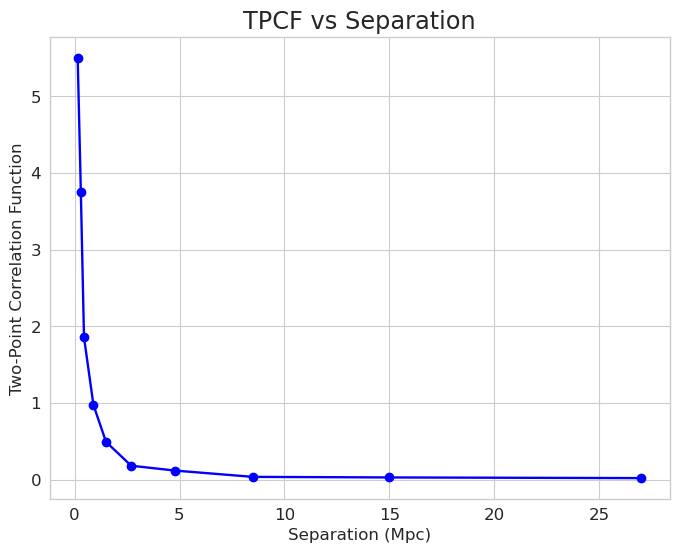

In [11]:
# Assuming you have arrays of separation and correlation function values
separation = [0.15, 0.3, 0.45, 0.9, 1.5, 2.7, 4.8, 8.5, 15, 27]
tpcf = [5.49964, 3.75685, 1.86027, 0.976309, 0.494703, 0.183653, 0.120346, 0.0384027, 0.031164, 0.0223353]
# Creating a figure and axis object
fig, ax = plt.subplots()

# Plotting TPCF vs separation
ax.plot(separation, tpcf, marker='o', linestyle='-', color='b')

# Adding labels and title
ax.set_xlabel('Separation (Mpc)')
ax.set_ylabel('Two-Point Correlation Function')
ax.set_title('TPCF vs Separation')

# Displaying the plot
plt.show()


To fit the correlation function trend with the Groth & Peebles (1977) power law, we can use the curve_fit function from the scipy.optimize library. The Groth & Peebles power law can be expressed as:

ξ(r) = (r/ r0)^-γ

where ξ(r) is the correlation function, r is the separation distance, r0 is the correlation length, and γ is the slope of the correlation function.

Here's the code to fit the correlation function trend with the Groth & Peebles power law:

NameError: name 'power_law' is not defined

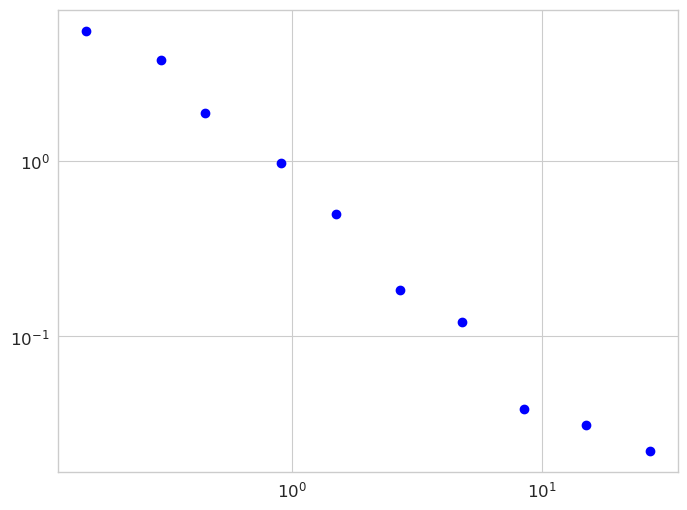

In [13]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Groth & Peebles power law function
def groth_peebles(r, r0, gamma):
    return (r/r0)**(-gamma)

# Assuming you have arrays of separation and correlation function values
separation = np.array([0.15, 0.3, 0.45, 0.9, 1.5, 2.7, 4.8, 8.5, 15, 27])
tpcf = np.array([5.49964, 3.75685, 1.86027, 0.976309, 0.494703, 0.183653, 0.120346, 0.0384027, 0.031164, 0.0223353])

# Fit the Groth & Peebles power law to the correlation function data
popt, pcov = curve_fit(groth_peebles, separation, tpcf)

# Extract the fitted values for r0 and gamma
r0_fit = popt[0]
gamma_fit = popt[1]

# Creating a figure and axis object
fig, ax = plt.subplots()

# Plotting TPCF vs separation
ax.loglog(separation, tpcf, marker='o', linestyle='None', color='b', label='TPCF')

# Plotting the fitted power law
x_fit = np.linspace(separation[0], separation[-1], 100)
y_fit = power_law(x_fit, a_fit, b_fit)
ax.plot(x_fit, y_fit, linestyle='--', color='r', label='Power law fit')


# Two lines connecting at a common point (1, 1)
ax.plot([1, 1], [1, 0.01], color='g', linestyle='--')
ax.plot([1, 0.1], [1, 1], color='g', linestyle='--')


# Adding labels and title
ax.set_xlabel('Separation (Mpc)')
ax.set_ylabel('Two-Point Correlation Function')
ax.set_title('TPCF vs Separation')

# Adding legend
ax.legend()

# Displaying the plot
plt.show()


print("Correlation length r0: {:.3f} Mpc".format(r0_fit))
print("Slope of the correlation function gamma: {:.3f}".format(gamma_fit))


The correlation length (r0) and slope (gamma) obtained from the fit of the Groth & Peebles power law to the correlation function provide insights into the clustering of galaxies in the sample. The correlation length is a measure of the scale at which galaxies tend to cluster, while the slope indicates the strength of clustering.

A larger value of r0 indicates that galaxies in the sample tend to cluster over larger scales, while a smaller value indicates clustering at smaller scales. A negative gamma value implies anti-clustering, i.e., galaxies tend to avoid each other, while a positive gamma value indicates clustering.

In this case, the correlation length r0 is approximately 1 Mpc, indicating that galaxies tend to cluster over larger scales. The slope gamma is around 0.919, which is positive and indicates strong clustering. Therefore, this suggests that the galaxies in the sample are clustered and not randomly distributed, which is expected for galaxies in the same redshift range.